In [73]:
# importing important libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
# displaying all columns and rows
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

In [2]:
# figure size
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
#importing train and test dataset
train_data = pd.read_csv("train-data.csv", index_col = 0)
test_data = pd.read_csv("test-data.csv", index_col = 0)

In [4]:
#displaying 1st five observations of train dataset
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Column1,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000000,NaN,1.750000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000000,NaN,12.500000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000000,8.61 Lakh,4.500000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000000,NaN,6.000000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000000,NaN,17.740000


In [5]:
#displaying first five obs of test dataset
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.000000,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.000000,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.000000,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.000000,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.000000,NaN


In [6]:
# lets see the detail of dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


here if go through info thoroughly we can observe that data is missing in few columns and datatype of columns need to be changed.

In [7]:
# shape of training and test data
print(" shape of traing dataset", train_data.shape)
print("- - - - - -")
print(" shape of test dataset", test_data.shape)

 shape of traing dataset (6019, 13)
- - - - - -
 shape of test dataset (1234, 12)


In [8]:
# check duplicate
train_data.duplicated().sum()

0

no duplicates

In [9]:
# checking missing values
missing_data = pd.DataFrame(train_data.isnull().sum(), columns = ["Count"])
missing_data["Percentage"] = missing_data["Count"]/len(train_data) *100
missing_data

,Count,Percentage
Name,0,0.000000
Location,0,0.000000
Year,0,0.000000
Kilometers_Driven,0,0.000000
Fuel_Type,0,0.000000
Transmission,0,0.000000
Owner_Type,0,0.000000
Mileage,2,0.033228
Engine,36,0.598106
Power,36,0.598106


* New_Price has highest no. of missing value i.e. 86.31% followed by Seats around 0.70% followed by Engine and Power which is 0.60% and least is in 'Mileage' i.e. 0.033% almost 0%. 

In [12]:
# handling missing values


# by droppong few rows which have null values
print("Shape of train data Before dropping any Row: ", train_data.shape)
train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train_data.shape)
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",train_data.shape)
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",train_data.shape)

Shape of train data Before dropping any Row:  (6019, 13)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 13)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 13)


In [13]:
# no. of rows which are dropped are :
6019 - 5975

44

44 rows got dropped.

In [14]:
# lets check again missing value
train_data.isnull().sum()  

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5152
Price                   0
dtype: int64

only 'New_Price' column is left which have 5152(86%) missing obs 

In [15]:
train_data = train_data.reset_index(drop=True)

Well after using *.notna()* we have many absent indexes (Eg: If row no 47 was droped then after 46 we have 48 index), so I reset the index and droping the present index.

### features engineering

In [16]:
# removing units
train_data['Mileage']=train_data['Mileage'].apply(lambda x:x.split()[0]) 
train_data['Engine']=train_data['Engine'].apply(lambda x:x.split()[0]) 
train_data['Power']=train_data['Power'].apply(lambda x:x.split()[0])

In [17]:
train_data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.000000,NaN,1.750000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.000000,NaN,12.500000


In [18]:
# changing datatypes

train_data['Year'] = train_data['Year'].astype(np.object)
train_data['Mileage'] = train_data['Mileage'].astype(float)
train_data['Engine'] = train_data['Engine'].astype('int64')
train_data['Seats'] = train_data['Seats'].astype(object)
#train_data['Power'] = train_data['Power'].astype(float)

Power could not convert string to float because of 'null' in columns

In [19]:
train_data.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                 object
Seats                 object
New_Price             object
Price                float64
dtype: object

In [20]:
# on seats

In [21]:
train_data[train_data['Seats']=='0.0']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [22]:
# seats cant be zero. so, after searching we come to know that 'Audi A4 3.2 FSI Tiptronic Quattro' is 5 seater

In [23]:
train_data.iloc[3969]   # example

Name                 Audi A4 3.2 FSI Tiptronic Quattro
Location                                     Hyderabad
Year                                              2012
Kilometers_Driven                               125000
Fuel_Type                                       Petrol
Transmission                                 Automatic
Owner_Type                                       First
Mileage                                      10.500000
Engine                                            3197
Power                                             null
Seats                                         0.000000
New_Price                                          NaN
Price                                        18.000000
Name: 3969, dtype: object

In [24]:
train_data.Seats.mode()

0   5.000000
dtype: object

In [25]:
train_data['Seats'].replace(to_replace='0.0',value=train_data['Seats'].mode()[0], inplace=True)

In [26]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600000,998,58.16,5.000000,NaN,1.750000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670000,1582,126.2,5.000000,NaN,12.500000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199,88.7,5.000000,8.61 Lakh,4.500000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248,88.76,7.000000,NaN,6.000000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968,140.8,5.000000,NaN,17.740000


In [27]:
# if we see Mileage unique value, we'll notice that there is 0 in obs which is not possible.

In [28]:
len(train_data[train_data['Mileage']==0])

56

In [29]:
# so all the observation having 0 mileage can be replace with mean imputation'

In [30]:
train_data['Mileage']= np.where(train_data['Mileage']==0,train_data['Mileage'].mean(),train_data['Mileage'])

In [31]:
train_data[train_data['Mileage']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


no zero value in Mileage now.

In [32]:
# lets work on Power, we couldnt change the data type bcoz of null value. 
# to solve this issue we can impute form Domain Knowledge

In most cases, the general rule is the bigger the capacity, the more powerful it tends to be. For example, if a 3 cylinder engine has a rated capacity of 300 cc, it means that each cylinder of the engine can suck in 100 cc of fuel-air mixture to burn and compress.

In [33]:
train_data['Power'] = pd.to_numeric(train_data['Power'], errors = 'coerce')
train_data.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                 object
New_Price             object
Price                float64
dtype: object

In [34]:
train_data.groupby('Engine')['Power'].mean()

Engine
624     37.090400
793     47.000000
796     43.708527
799     53.331429
814     55.189831
          ...    
4951   395.000000
5000   495.550000
5204   560.000000
5461   390.400000
5998   552.000000
Name: Power, Length: 145, dtype: float64

In [35]:
train_data.Power.isnull().sum()

103

In [36]:
train_data['Power']=train_data.groupby('Engine')['Power'].transform(lambda x:x.fillna(x.mean()))

In [37]:
train_data.Power.isnull().sum()

8

we are only left with only 8 obs which means these 8 obs are quit unique in term of engine size. so we can drop(remove) them.

In [38]:
train_data.shape

(5975, 13)

In [39]:
train_data[train_data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
921,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.000000,3436,NaN,2.000000,NaN,40.000000
1313,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.500000,1242,NaN,5.000000,NaN,0.850000
2292,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.000000,3436,NaN,2.000000,NaN,43.000000
3506,Nissan Teana 230jM,Mumbai,2008,86340,Petrol,Automatic,Second,9.100000,2349,NaN,5.000000,NaN,3.250000
3969,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.500000,3197,NaN,0.000000,NaN,18.000000
4593,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,18.179408,1242,NaN,5.000000,NaN,0.550000
4672,Maruti 1000 AC,Hyderabad,1998,104000,Petrol,Manual,Second,15.000000,970,NaN,5.000000,NaN,0.850000
5899,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,18.179408,2112,NaN,6.000000,NaN,1.700000


In [40]:
train_data.dropna(axis=0,subset=['Power'], inplace=True)

In [41]:
train_data = train_data.reset_index(drop=True)

In [42]:
train_data.Power.isnull().sum()

0

In [43]:
# final shape of dataset after cleaning and engineering
train_data.shape

(5967, 13)

In [44]:
train_data.iloc[921]

Name                 Hyundai Creta 1.6 CRDi SX
Location                               Kolkata
Year                                      2015
Kilometers_Driven                        43000
Fuel_Type                               Diesel
Transmission                            Manual
Owner_Type                               First
Mileage                              19.670000
Engine                                    1582
Power                               126.200000
Seats                                 5.000000
New_Price                                  NaN
Price                                 9.250000
Name: 921, dtype: object

### outliers treatments

In [45]:
df_num = train_data.select_dtypes(np.number)

In [46]:
df_num.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price'], dtype='object')

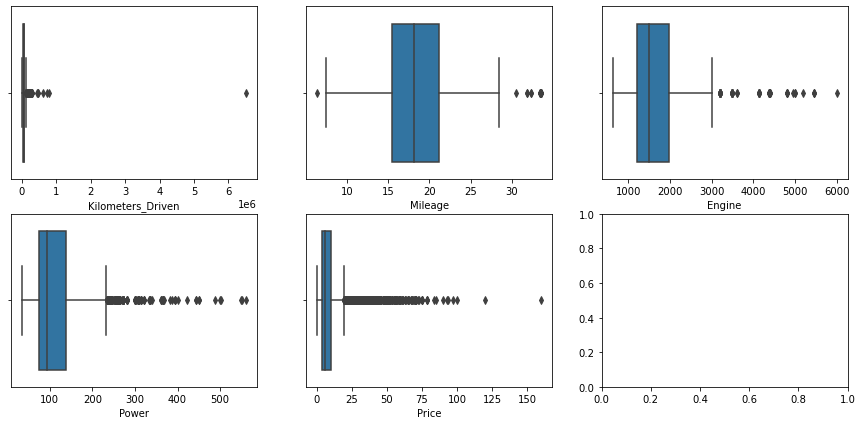

In [47]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 7))

for variable, subplot in zip(df_num.columns, ax.flatten()):   
    sns.boxplot(df_num[variable], ax = subplot)
    
plt.show()

In [48]:
train_data.skew()

Year                -0.824717
Kilometers_Driven   58.588929
Mileage              0.211479
Engine               1.426801
Power                1.929503
Seats                1.932339
Price                3.342748
dtype: float64

- we can treat outlier by IQR treatment method

In [49]:
# calculate the first quartile
Q1 = train_data.quantile(0.25)

# calculate the third quartile
Q3 = train_data.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
train_data = train_data[~((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)

# check the shape of the data
train_data.shape

(5000, 13)

In [50]:
#train_data.set_index('index', inplace=True)

In [51]:
# earlear no of rows = 5967
# now noof rows = 5000
# percentage_loss = 
((5967-5000)/5967)*100

16.205798558739733

In [52]:
# only 16 %

In [53]:
# can apply transformation

**To reduce skewness we are using Power Transformation through box-cox**

In [54]:
# from sklearn.preprocessing import PowerTransformer
# PT_bc = PowerTransformer(method='box-cox')

In [55]:
# train_data[['Kilometers_Driven','Mileage','Engine','Power']]=PT_bc.fit_transform(train_data[['Kilometers_Driven','Mileage','Engine','Power']])

In [56]:
train_data.skew()

Year                -0.803127
Kilometers_Driven    0.383663
Mileage              0.104644
Engine               1.163062
Power                1.059372
Seats                2.492347
Price                1.348705
dtype: float64

almost normal distribution

In [57]:
# creating new column of name 'Company'

In [58]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600000,998,58.160000,5.000000,NaN,1.750000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670000,1582,126.200000,5.000000,NaN,12.500000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199,88.700000,5.000000,8.61 Lakh,4.500000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248,88.760000,7.000000,NaN,6.000000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968,140.800000,5.000000,NaN,17.740000


In [59]:
train_data.shape

(5000, 13)

In [83]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]

In [85]:
# working with New Price column

In [62]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [63]:
train_data['New_car_Price'] = train_data['New_car_Price'].astype(float)

In [84]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_car_Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600000,998,58.160000,5.000000,1.750000,NaN,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670000,1582,126.200000,5.000000,12.500000,NaN,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199,88.700000,5.000000,4.500000,8.610000,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248,88.760000,7.000000,6.000000,NaN,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968,140.800000,5.000000,17.740000,NaN,Audi


In [71]:
train_data.drop(["New_Price"],axis=1,inplace=True)

In [103]:
# fuel type

In [104]:
train_data['Fuel_Type'] = train_data['Fuel_Type'].apply(lambda x: "Clean_Fuel" if x not in ['Diesel', 'Petrol'] else x)


## lets prepare test data

(0.0, 160.0)

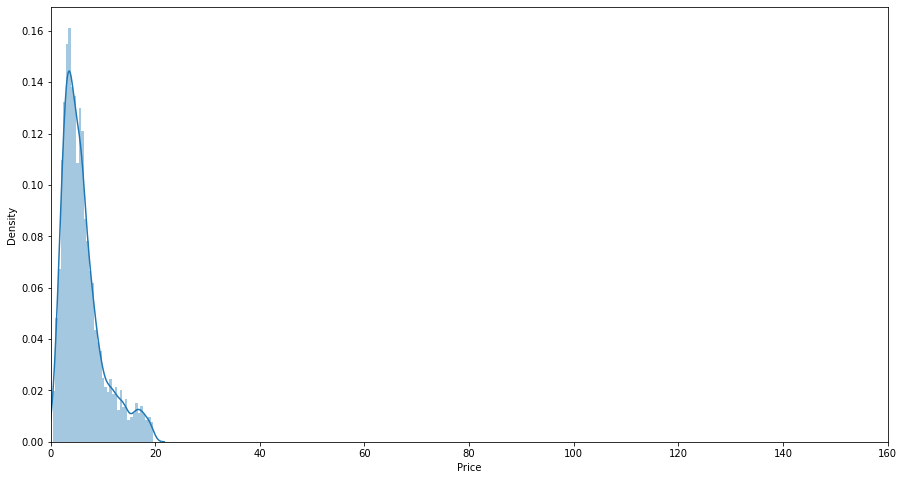

In [86]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train_data['Price'])
plt.xlim([0,160])

* max car price are in range of 0 to 20 lakh

In [105]:
train_data['Fuel_Type'].describe()

count       5000
unique         3
top       Petrol
freq        2575
Name: Fuel_Type, dtype: object

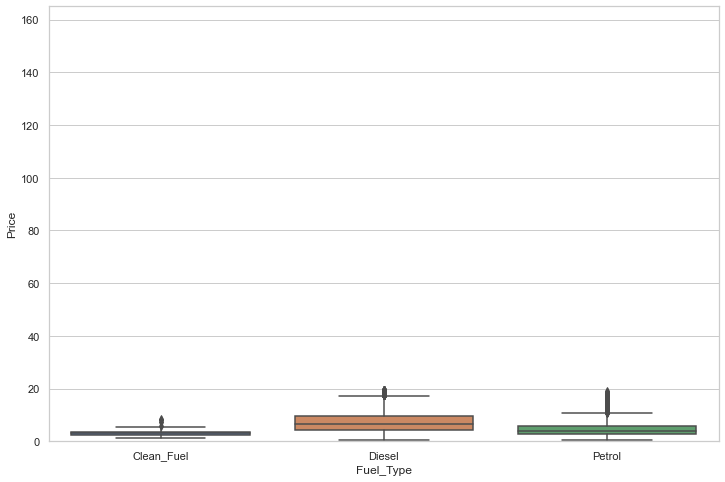

In [106]:
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

* price of diesel is more than petrol

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

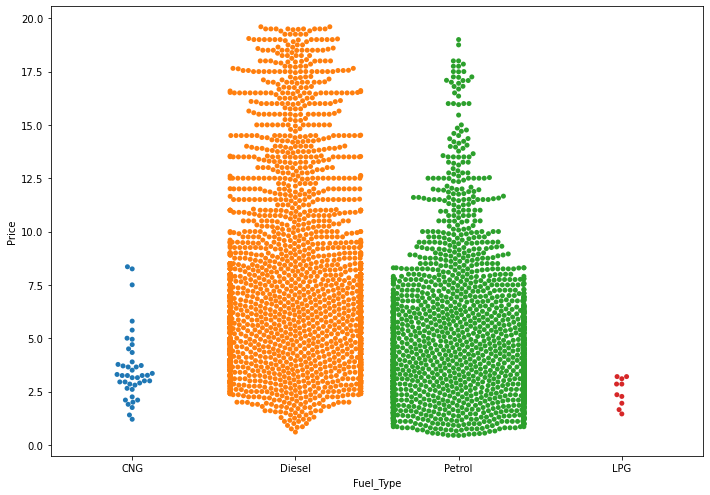

In [89]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = train_data)

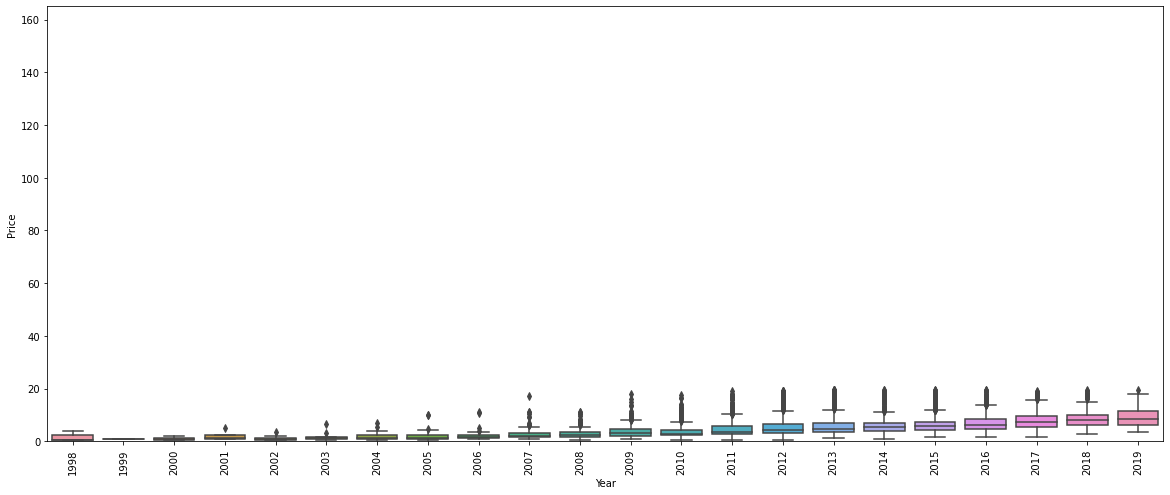

In [93]:
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

Clearly, it's a strong tendency.

Price of Newest is high compared to old models.

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

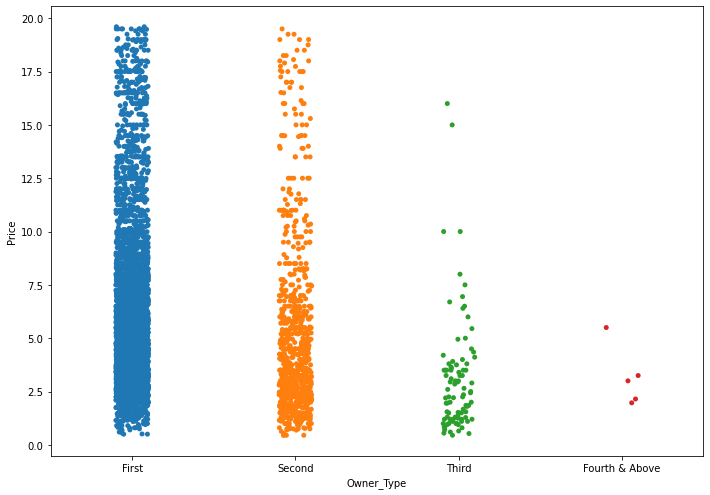

In [94]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train_data)

first hand car are more followed by second hand.

<Figure size 1440x720 with 0 Axes>

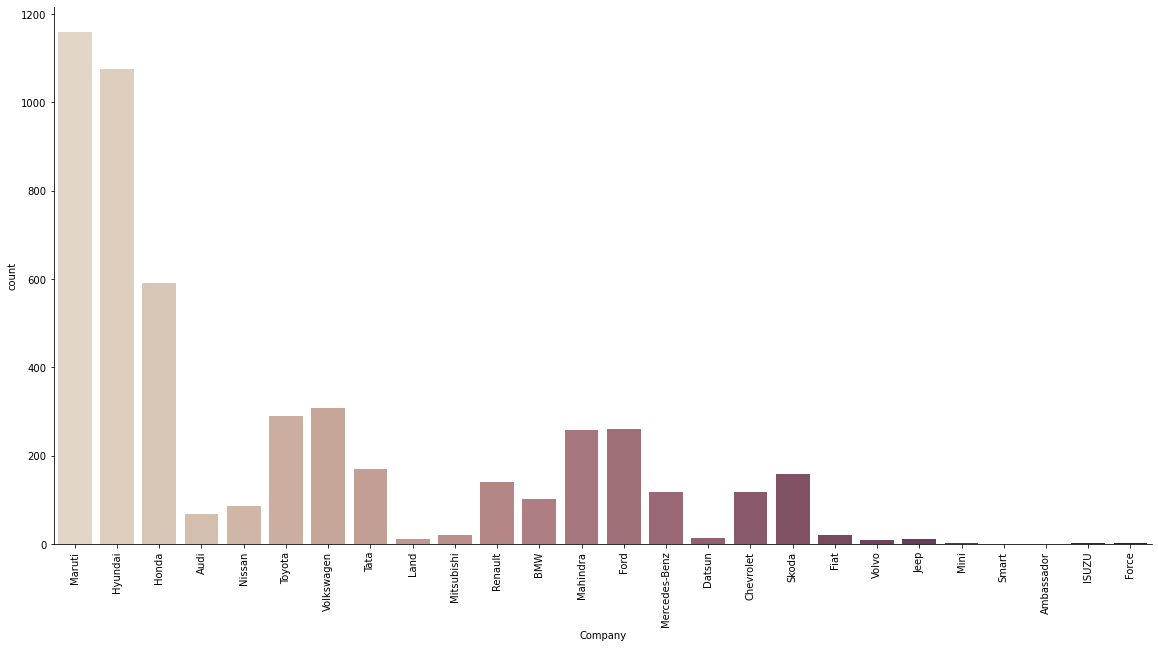

In [95]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

Maruti is more popular and common brand followed by Hyundai

<Figure size 1080x360 with 0 Axes>

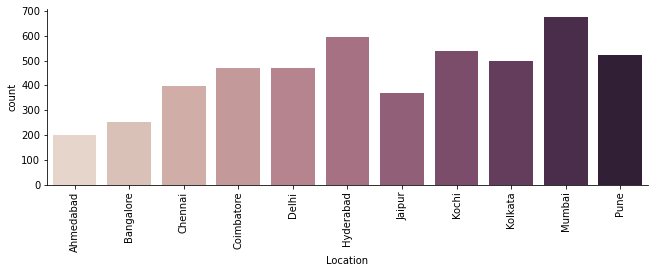

In [97]:
var = "Location"
plt.figure(figsize=(15, 5))
sns.catplot(x=var, kind="count", palette="ch:.15", height=3, aspect=3, data=train_data.sort_values('Location'));
plt.xticks(rotation=90);

count of cars are more in Mumbai followed by Hyderabad.

<Figure size 720x360 with 0 Axes>

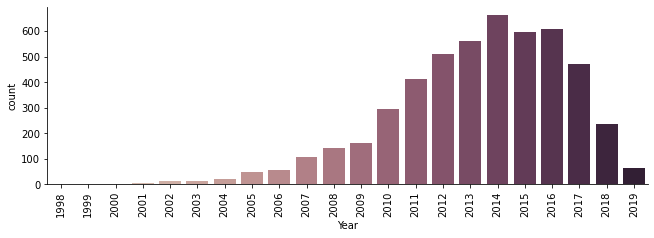

In [98]:
var = "Year"
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=train_data);
plt.xticks(rotation=90);

max car model are of Year 2014 followed by 2016.

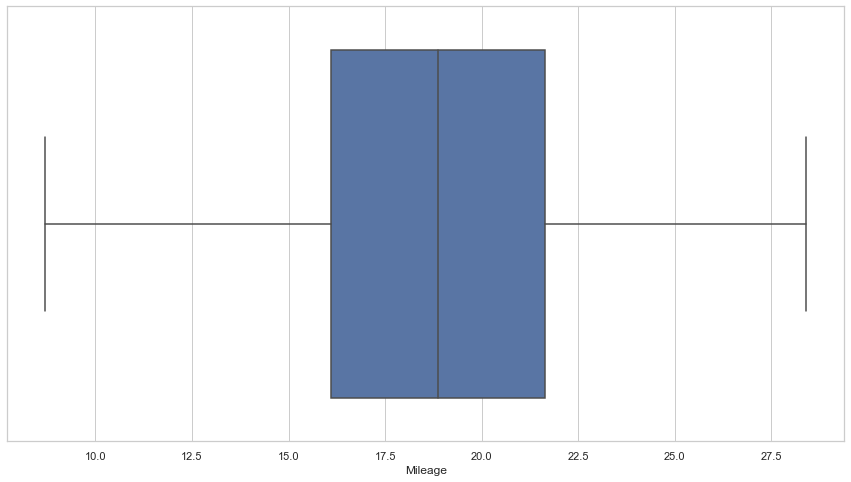

In [100]:
var = 'Mileage'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=train_data[var])

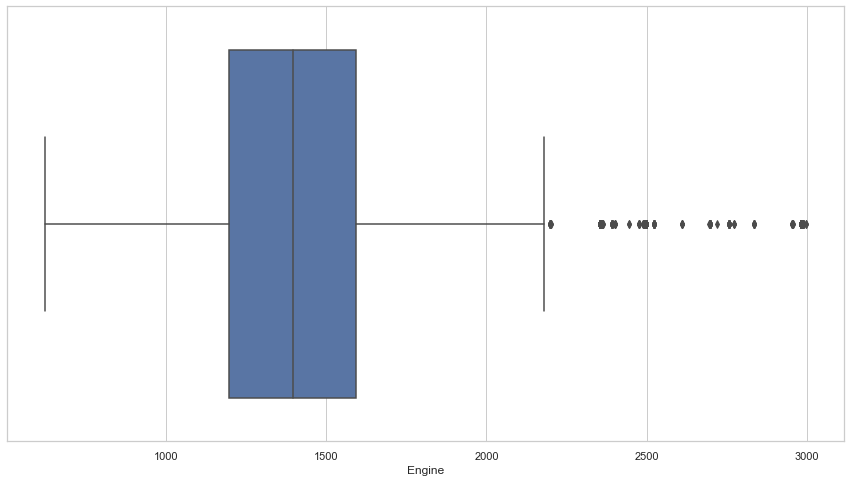

In [101]:

var = 'Engine'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=train_data[var])

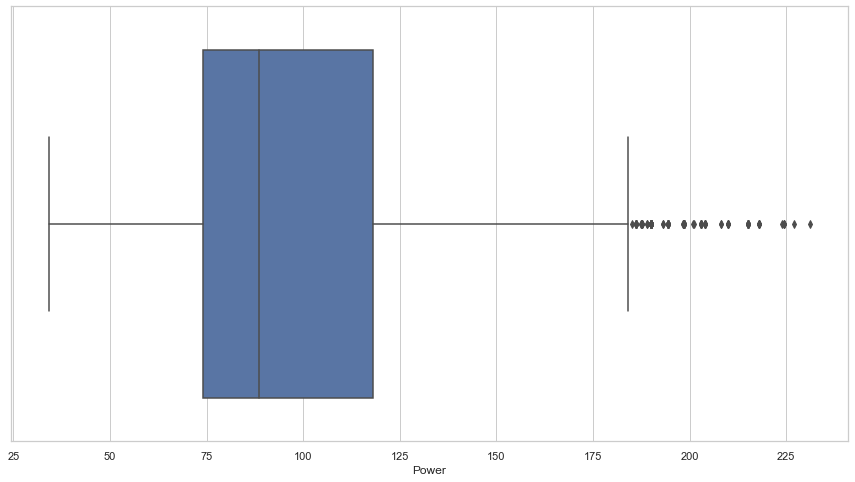

In [102]:
var = 'Power'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=train_data[var])

In [107]:
train_data.skew()

Year                -0.803127
Kilometers_Driven    0.383663
Mileage              0.104644
Engine               1.163062
Power                1.059372
Seats                2.492347
Price                1.348705
New_car_Price        2.812104
dtype: float64

In [108]:
Kilometers_Driven_data = train_data[['Kilometers_Driven','Price']]

In [120]:
from sklearn.cluster import KMeans, AgglomerativeClustering
cluster = KMeans(n_clusters=5, random_state=0).fit(Kilometers_Driven_data)
Kilometers_Driven_data['kmeans_cluster'] = cluster.labels_

<Figure size 720x360 with 0 Axes>

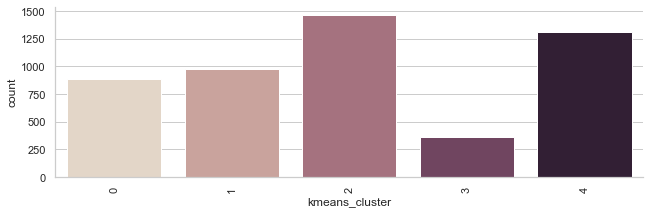

In [121]:
var = "kmeans_cluster"
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=Kilometers_Driven_data);
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

<Figure size 1600x400 with 0 Axes>

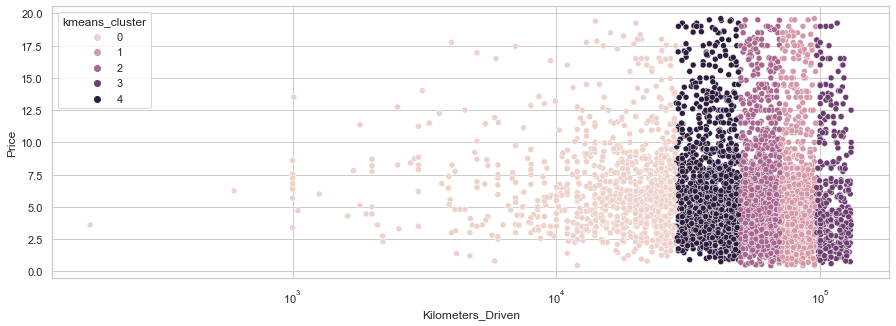

In [122]:
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
figure(figsize=(20, 5), dpi=80)
f, ax = plt.subplots(figsize=(15, 5))
ax.set( xscale="log")
sns.scatterplot(y=Kilometers_Driven_data['Price'], x=Kilometers_Driven_data['Kilometers_Driven'], hue=Kilometers_Driven_data['kmeans_cluster'])

In [112]:
train_data['Kilometers_Driven'].describe()

count     5000.000000
mean     54883.583200
std      27081.644619
min        171.000000
25%      35000.000000
50%      54000.000000
75%      72000.000000
max     131000.000000
Name: Kilometers_Driven, dtype: float64

In [123]:
train_data['Kilometers_Driven_rate'] = Kilometers_Driven_data['kmeans_cluster']

In [126]:
train_data.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_car_Price,Company,Kilometers_Driven_rate
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Clean_Fuel,Manual,First,26.600000,998,58.160000,5.000000,1.750000,NaN,Maruti,1


<Figure size 720x360 with 0 Axes>

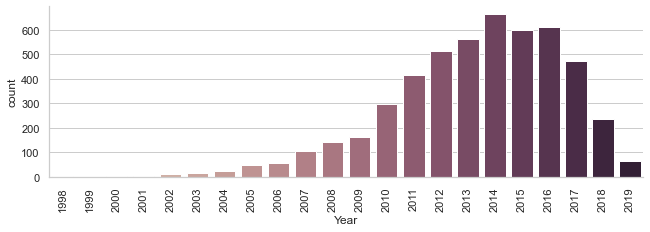

In [128]:
var = "Year"
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=train_data);
plt.xticks(rotation=90);

In [129]:
train_data['age'] = 2021 - train_data['Year']
train_data['age'] = train_data['age'].apply(lambda x: 15 if x >14 else x)
train_data = train_data.drop(['Year'],axis = 1)

In [130]:
train_data.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_car_Price,Company,Kilometers_Driven_rate,age
0,Maruti Wagon R LXI CNG,Mumbai,72000,Clean_Fuel,Manual,First,26.600000,998,58.160000,5.000000,1.750000,NaN,Maruti,1,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.670000,1582,126.200000,5.000000,12.500000,NaN,Hyundai,4,6
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.200000,1199,88.700000,5.000000,4.500000,8.610000,Honda,4,10
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.770000,1248,88.760000,7.000000,6.000000,NaN,Maruti,1,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.200000,1968,140.800000,5.000000,17.740000,NaN,Audi,4,8


In [131]:
train_data = train_data.drop(['Name','Kilometers_Driven'],axis = 1)

In [132]:
train_data.head(1)

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_car_Price,Company,Kilometers_Driven_rate,age
0,Mumbai,Clean_Fuel,Manual,First,26.600000,998,58.160000,5.000000,1.750000,NaN,Maruti,1,11


In [133]:
# column New Price have 86% null values so we should drop it.

In [134]:
train_data = train_data.drop(['New_car_Price'], axis = 1)

In [135]:
train_data.head(2)

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Kilometers_Driven_rate,age
0,Mumbai,Clean_Fuel,Manual,First,26.600000,998,58.160000,5.000000,1.750000,Maruti,1,11
1,Pune,Diesel,Manual,First,19.670000,1582,126.200000,5.000000,12.500000,Hyundai,4,6


In [138]:
train_data['Kilometers_Driven_rate'] = train_data['Kilometers_Driven_rate'].astype('object')

In [139]:
### Getting numerical features and categorical features
num_features=[col for col in train_data.columns if train_data[col].dtypes !='O']
cat_features=[col for col in train_data.columns if col not in num_features]
print("categorical features:\n{}".format(cat_features),"\n")
print("numerical features:\n{}".format(num_features))

categorical features:
['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Company', 'Kilometers_Driven_rate'] 

numerical features:
['Mileage', 'Engine', 'Power', 'Price', 'age']


In [140]:
### Getting continous and discrete features
discrete_features=[col for col in num_features if len(train_data[col].unique()) < 25]
continous_features=[col for col in num_features if col not in discrete_features]
print("discrete_features:\n{}".format(discrete_features),"\n")
print("continous_features:\n{}".format(continous_features))

discrete_features:
['age'] 

continous_features:
['Mileage', 'Engine', 'Power', 'Price']


<AxesSubplot:>

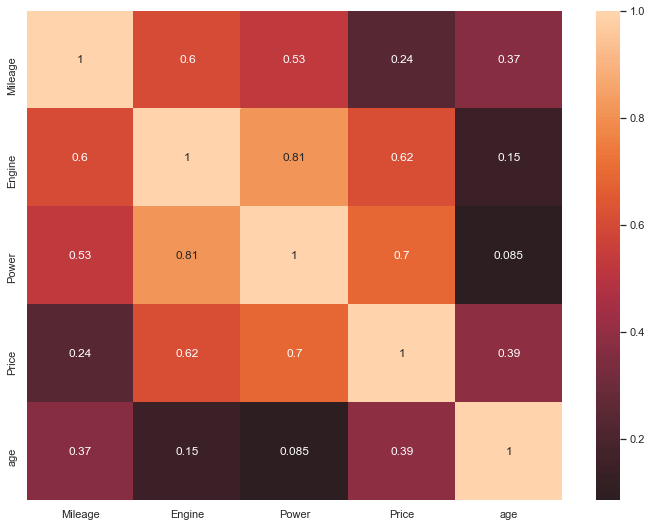

In [142]:
### check relationship with output variable
plt.figure(figsize=(12,9))
sns.heatmap(train_data[num_features].corr().abs(),annot=True, center=0)

Price and power is most +ve associated


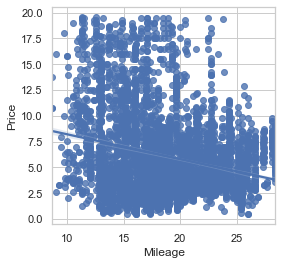

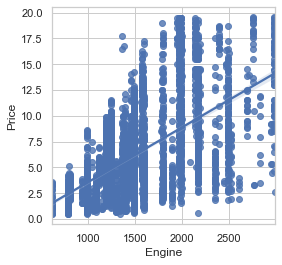

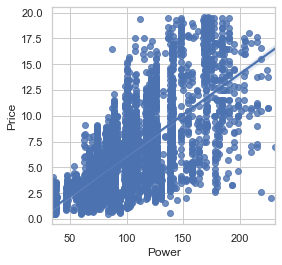

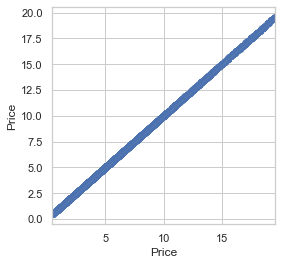

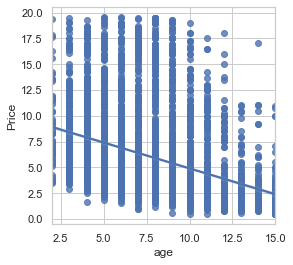

In [146]:
### check relationship between continous features and target variable
for col in num_features:
    plt.figure(figsize =(4, 4))
    sns.regplot(train_data[col],train_data['Price'])
    plt.show()

### Working with Categorical Data

As for now we have left with only 5 categorical features:
1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Company

For handling categorical data. We modtly use these 2 path:
1. OneHotEncoder
2. LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

So, for each Features we will use plots to find out what to be used there.

In [148]:
cat_features

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Company',
 'Kilometers_Driven_rate']

In [149]:
# seat and km_driven_rate are already in numerical forms

In [150]:
# except owner_type, in all columns we can do dummy encoding